# Protocol for experiment 53 "Flow through porose Media"

<div class="alert alert-block alert-warning">
    
Before handing in the report, please check:
    
- the consistency of your units
    
- the name of the students appear
    
- all useless parts have been deleted (function examples that are not used, theory sample)
    

**Date:** {2023-MM-DD}  
**Version:** {1 for 1st assignment, 2 for corrected assignment, ...}
 
 - **Student 1:** {full name}
 - **Student 2:** {full name}

## 1. Introduction

### 1.1 Introduction to the experiment

- What is the experiment about? What is the objective?


### 1.2 Summary of theory

<div class="alert alert-block alert-info"> 

- Write all the formulas you will use. Label the variables and mention their units. Check the coherence of your units (e.g. no [m] * [km]). Convert them if neccessary. Derive the units of the result and check that it corresponds to those you want (SI-units or specific units).
    
- When you perform your calculations, just refer to these formulas, input your measurements in the adequate unit and you should get coherent units !
    </div>
    
- Explanation of the formulas used incl. variable labeling (example from preliminary experiment) and units.
    - Representation e.g. by  
    "\\$\\$ T = 2\pi \sqrt{\frac{L}{g}} \\$\\$" $\rightarrow$ 
    $$T=2\pi\sqrt{\frac{L}{g}}$$  
    where $T$ is the period of oscillation of the pendulum for one oscillation **[s]**, $L$ is the length of the pendulum **[m]**, and $g$ is the acceleration due to gravity **[ms⁻2]**.
    
    <div class="alert alert-block alert-danger">
    
    $\rightarrow$ if you measured L in **[cm]**, convert it to **[m]** before computing the result. It may sound trivial but it is a recurrent error !
    </div>

<div class="alert alert-block alert-success"> 

**Specific questions about the experiment:**
    
- With your own words, describe what represents the saturated hydraulic conductivity K.
    
- Looking at the formula for K, explain the terms and what this formula means physically.
    
</div>
    
### 1.3 Tasks

- What are the tasks for the experiment?

### 1.4 Environmental relevance

- How is the experiment relevant to your studies in environmental science? (1-2 sentences)

## 2. Packages and Functions

### 2.1 Load packages
You may not use all of these packages. You can comment out the ones you don't need.

In [40]:
# import packages  (not every package is used in each notebook template)

# numerical computing
import numpy as np                    # Fmndamental package for numerical computing in Python

# uncertainty calculations
from uncertainties import ufloat      # For handling numbers with uncertainties
from uncertainties.umath import *     # For applying mathematical functions with uncertainties
from uncertainties import unumpy      # For handling uncertainties in arrays

# data manipulation and analysis
import pandas as pd                   # Powerful data manipulation and analysis library

# data visualization in tables
from tabulate import tabulate

# data visualization in plots
import matplotlib.pyplot as plt       # Library for creating static, interactive, and animated visualizations

# scientific computing
import scipy as sc                    # Open-source scientific computing library
from scipy.stats import linregress    # For performing linear regression analysis
from scipy.constants import R         # Physical and mathematical constants

# interactive display in Jupyter Notebook
from IPython.display import display, Markdown, Image   # For displaying rich content (e.g., Markdown) in Jupyter Notebook

# standard mathematical functions
import math                          # Python's built-in math functions

# widgets (to create elements such as dynamic input/output boxes)
import ipywidgets as widgets

from prettytable import PrettyTable



<div class="alert alert-block alert-info"> 

**If it appears that some packages are not installed on your laptop, you can install them uncommenting and running the cells below.**
    

In [41]:
# !pip install uncertainties
# !pip install prettytable

### 2.2 Define functions

In [42]:
# example of a function: compute the gravity force F = m*g

def compute_gravity_force(m,g):
    F = m*g
    return F

# compute_gravity_force is the function name
# m and g are the arguments of the function


In [43]:
# later, I can compute the gravity force, calling the function defined earlier:


# 1. By inserting directly desired values in the arguments of my function

F1 = compute_gravity_force(50, 9.81)
print("F1 =", F1, "[N]")

# 2.1 By defining variables and calling them

m = 30
g = 9.81

F2 = compute_gravity_force(m,g)
print("F2 =", F2, "[N]")

# 2.2 Variables don't need to have the same name as arguments,
# only the position is binding.

mass = 50
g_moon = 1.625

F3 = compute_gravity_force(mass, g_moon)
print("F3 =", F3, "[N]")


F1 = 490.5 [N]
F2 = 294.3 [N]
F3 = 81.25 [N]


#### <span style='color:darkcyan'> Your functions: </span>

<div class="alert alert-block alert-info">
    <b>Tip</b>: <br/>
    1) Here is the place to <b>define all the functions you need</b> in this notebook. This helps to keep your notebook clear and structured.<br/>
    2) Add <b>comments</b> to your functions (e.g. what is the function good for, what happens in each line, etc.), so that you and your lab partner will still be able to understand the code at a later time.

In [52]:
def compute_K(Delta_H, Delta_L, V, A, t):
    K = -V*Delta_L/(A*t*Delta_H)
    return K

In [53]:
def compute_kappa(K, rho_w, g, dyn_visc):
    kappa = K*dyn_visc/(rho_w*g)*10            # factor 10 comes from the conversion to [cm²]
    return kappa

### 2.3 Tables

In [61]:
pi_pk = ['p3 to p1', 'p3 to p2', 'p2 to p1']

In [62]:
def make_const_table(material, valve, V, t, P1, P2, P3):
    const = PrettyTable()
    const.field_names = [material, "V [cm³]", "t [s]", "P1 [cm]","P2 [cm]","P3 [cm]"]
    const.add_row([valve, V, t, P1, P2, P3])            
    print(const)

In [63]:
def make_table(valve, pi_pk, Delta_L, Delta_H, K, kappa):
    table = PrettyTable()
    table.field_names = [valve,"L [cm]","Delta H [cm]", "K [cm/s]","kappa [cm²]"]
    for i in range(len(K)):
        table.add_row([pi_pk[i],Delta_L[i], Delta_H[i], K[i], kappa[i]])
    print(table)

## 3. Experiments

### 3.0 Empirical approach

A formula for assessing soil hydraulic conductivity from the particle size data exist. Let's apply it before doing the experiment !

$$ \log_{10}{(KS^2)} = a+bn $$

Where:
- K is the hydraulic conductivity **[cm/s]**
- S is the specific surface of the particles, i.e. the surface of a sphere of radius r dividing by its volume:
$ S = \frac{Area}{Volume} =\frac{4\pi r^2}{\frac{4}{3}\pi r^3} = \frac{3}{r} $
- n is the porosity of the soil **(as a fraction, not a percentage)**
- a and b are correlation coefficients, a = 1.365 and b = 5.15

Rearranging the equation to isolate K, replacing S by  :


$$K = 10^{a+bn}\cdot \frac{r^2}{9}$$ 

<p style="text-align: center;"> The units of K are <strong>[cm/s]</strong> </p>

#### Here, we translate the function written above in Python:

In [64]:
def compute_K_empirical(a,b,n,r):
    K = 10**(a+b*n)*r**2/9
    return K

Hints:
- There are 3 types of "soil" in our experiment. The particles have the following <b>diameter</b>:

Coarse:       $d = 1'000 \mu m = 1 mm$

Fine:         $d = 500 \mu m$

Very Fine:    $d = 120 \mu m$

- The porosity depends on how the spheres are arranged. Mathematical derivations give:

n $\approx 0.476$ for regular cubic-packed spheres:

n $\approx 0.26$ for rhombohedral-packed spheres:


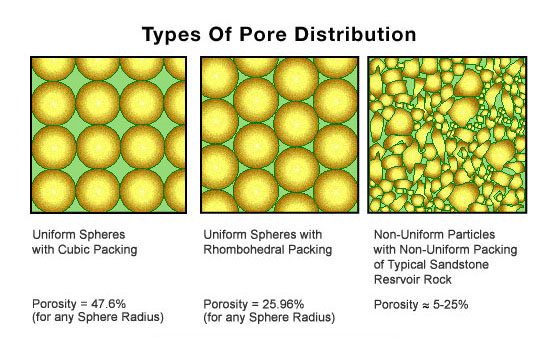

## Compute the hydraulic theoretical conductivity for the coarse and fine column. At the end, compare the results of your experiment with those.

#### Computation for the coarse column:

In [65]:
K_coarse = compute_K_empirical(1.365,5.15,0.40,0.1) # call the function with adequate parameters
print("Emprical approach gives K_coarse = ", K_coarse, " [cm/s]")

Emprical approach gives K_coarse =  2.9563611775542324  [cm/s]


#### Computation for the fine column:

In [66]:
K_fine = compute_K_empirical(1.365,5.15,0.40,0.012) # call the function with adequate parameters
print("Emprical approach gives K_fine = ", K_fine, " [cm/s]")

Emprical approach gives K_fine =  0.04257160095678094  [cm/s]


### **3.1 Measurement Data**

<div class="alert alert-block alert-info">
    <b>Tip</b>: Take care when choosing names for your variables - make sure that you <b>don't use the same name for different variables</b> (throughout the whole notebook!) <br/>
    If you measure the same quantity in more than one experiment, you can e.g. include the experiment number in the variable name to make it unique. <br/>
    <small>Otherwise the value of the variable will depend on the order in which you execute the cells, which may cause confusion and wrong results if you don't always execute them from top to bottom.</small><br/>
    <b>When naming a variable, use an index for the soil column type (Coarse: C, Fine: F, Mixed: M) as well as another index for the opened switch (Upper: u, Middle: m, Lower: l).</b> Using this indexation will be easier for everybody to understand :)<br/> 
    <b>Example:</b> K_Mu refers to the conductivity of the <b>Mixed</b> column, with the <b>upper</b> switch opened.

### Define your constants. They stay the same for the experiment. What are the units ? And what is the dimension: scalar or vector ?

In [67]:
Delta_L = np.array([10,5,5]) # [cm], length 3
A = np.pi*2.5**2             # [cm²], scalar (same for all measurements)
rho_w = 998                  # [kg/m³]
g = 9.81                     # [m s⁻2]

# Compute the dynamic viscosity

param_A = 2.41410 * 1e-5
param_B = 247.8
param_C = 140
T = 293

dyn_visc = param_A*10**(param_B/(T-param_C))   # [Pa*s] = [kg/m/s]

### **3.1.1 Column with coarse grain**

__a) upper valve open__

In [68]:
# Here, we use ufloat to initialize a variable with its uncertainty. 
# Be careful to the units, lengths in [cm], volumes in [cm³], t in [s]...

V_Cu = ufloat(248,1)         # [cm³]
t_Cu = ufloat(75,0.2)        # [s]
P1_Cu = ufloat(68.5,0.1)     # [cm]
P2_Cu = ufloat(68.25,0.1)    # [cm]
P3_Cu = ufloat(68.1,0.1)     # [cm]

# Compute the DeltaH 
Delta_H_Cu = np.array([P3_Cu - P1_Cu, P3_Cu - P2_Cu, P2_Cu - P1_Cu])

# Compute the hydraulic conductivity and the permeability. K is in [cm/s]

K_Cu = compute_K(Delta_H_Cu, Delta_L, V_Cu, A, t_Cu) 
kappa_Cu = compute_kappa(K_Cu, rho_w, g, dyn_visc)

# DISPLAY TABLE =================================================================
make_const_table("COARSE", "upper valve open", V_Cu, t_Cu, P1_Cu, P2_Cu, P3_Cu)
make_table("upper valve open", pi_pk, Delta_L, Delta_H_Cu, K_Cu, kappa_Cu)

+------------------+-------------+--------------+--------------+--------------+--------------+
|      COARSE      |   V [cm³]   |    t [s]     |   P1 [cm]    |   P2 [cm]    |   P3 [cm]    |
+------------------+-------------+--------------+--------------+--------------+--------------+
| upper valve open | 248.0+/-1.0 | 75.00+/-0.20 | 68.50+/-0.10 | 68.25+/-0.10 | 68.10+/-0.10 |
+------------------+-------------+--------------+--------------+--------------+--------------+
+------------------+--------+--------------+-----------+-----------------+
| upper valve open | L [cm] | Delta H [cm] |  K [cm/s] |   kappa [cm²]   |
+------------------+--------+--------------+-----------+-----------------+
|     p3 to p1     |   10   | -0.40+/-0.14 | 4.2+/-1.5 | (4.3+/-1.5)e-06 |
|     p3 to p2     |   5    | -0.15+/-0.14 |   6+/-5   |   (6+/-5)e-06   |
|     p2 to p1     |   5    | -0.25+/-0.14 | 3.4+/-1.9 | (3.5+/-2.0)e-06 |
+------------------+--------+--------------+-----------+-----------------+


__b) middle valve open__

In [95]:
# Here, we use ufloat to initialize a variable with its uncertainty. 
# Be careful to the units, lengths in [cm], volumes in [cm³], t in [s]...

V_Cm = ufloat(178,1)         # [cm³]
t_Cm = ufloat(83,0.2)        # [s]
P1_Cm = ufloat(41.6,0.1)     # [cm]
P2_Cm = ufloat(41.5,0.1)    # [cm]
P3_Cm = ufloat(41.4,0.1)     # [cm]

# Compute the DeltaH 
Delta_H_Cm = np.array([P3_Cm - P1_Cm, P3_Cm - P2_Cm, P2_Cm - P1_Cm])

# Compute the hydraulic conductivity and the permeability. K is in [cm/s]

K_Cm = compute_K(Delta_H_Cm, Delta_L, V_Cm, A, t_Cm)
kappa_Cm = compute_kappa(K_Cm, rho_w, g, dyn_visc)

# DISPLAY TABLE =================================================================
make_const_table("COARSE", "middle valve open", V_Cm, t_Cm, P1_Cm, P2_Cm, P3_Cm)
make_table("middle valve open", pi_pk, Delta_L, Delta_H_Cm, K_Cm, kappa_Cm)

+-------------------+-------------+--------------+--------------+--------------+--------------+
|       COARSE      |   V [cm³]   |    t [s]     |   P1 [cm]    |   P2 [cm]    |   P3 [cm]    |
+-------------------+-------------+--------------+--------------+--------------+--------------+
| middle valve open | 178.0+/-1.0 | 83.00+/-0.20 | 41.60+/-0.10 | 41.50+/-0.10 | 41.40+/-0.10 |
+-------------------+-------------+--------------+--------------+--------------+--------------+
+-------------------+--------+--------------+----------+-------------+
| middle valve open | L [cm] | Delta H [cm] | K [cm/s] | kappa [cm²] |
+-------------------+--------+--------------+----------+-------------+
|      p3 to p1     |   10   | -0.20+/-0.14 |  5+/-4   | (6+/-4)e-06 |
|      p3 to p2     |   5    | -0.10+/-0.14 |  5+/-8   | (6+/-8)e-06 |
|      p2 to p1     |   5    | -0.10+/-0.14 |  5+/-8   | (6+/-8)e-06 |
+-------------------+--------+--------------+----------+-------------+


__c) lower valve open__

In [96]:
# Here, we use ufloat to initialize a variable with its uncertainty. 
# Be careful to the units, lengths in [cm], volumes in [cm³], t in [s]...

V_Cl = ufloat(102,1)         # [cm³]
t_Cl = ufloat(74,0.2)        # [s]
P1_Cl = ufloat(28.1,0.1)     # [cm]
P2_Cl = ufloat(28.0,0.1)     # [cm]
P3_Cl = ufloat(27.9,0.1)     # [cm]

# Compute the DeltaH 
Delta_H_Cl = np.array([P3_Cl - P1_Cl, P3_Cl - P2_Cl, P2_Cl - P1_Cl])

# Compute the hydraulic conductivity and the permeability. K is in [cm/s]

K_Cl = compute_K(Delta_H_Cl, Delta_L, V_Cl, A, t_Cl)
kappa_Cl = compute_kappa(K_Cl, rho_w, g, dyn_visc)

# DISPLAY TABLE =================================================================
make_const_table("COARSE", "lower valve open", V_Cl, t_Cl, P1_Cl, P2_Cl, P3_Cl)
make_table("lower valve open", pi_pk, Delta_L, Delta_H_Cl, K_Cl, kappa_Cl)

+------------------+-------------+--------------+--------------+--------------+--------------+
|      COARSE      |   V [cm³]   |    t [s]     |   P1 [cm]    |   P2 [cm]    |   P3 [cm]    |
+------------------+-------------+--------------+--------------+--------------+--------------+
| lower valve open | 102.0+/-1.0 | 74.00+/-0.20 | 28.10+/-0.10 | 28.00+/-0.10 | 27.90+/-0.10 |
+------------------+-------------+--------------+--------------+--------------+--------------+
+------------------+--------+--------------+-----------+-----------------+
| lower valve open | L [cm] | Delta H [cm] |  K [cm/s] |   kappa [cm²]   |
+------------------+--------+--------------+-----------+-----------------+
|     p3 to p1     |   10   | -0.20+/-0.14 | 3.5+/-2.5 | (3.6+/-2.5)e-06 |
|     p3 to p2     |   5    | -0.10+/-0.14 |   4+/-5   |   (4+/-5)e-06   |
|     p2 to p1     |   5    | -0.10+/-0.14 |   4+/-5   |   (4+/-5)e-06   |
+------------------+--------+--------------+-----------+-----------------+


### **Conclusion: Compute the mean value of the coarse grain column**

In [73]:
K_coarse_mean = np.mean([K_Cu, K_Cm, K_Cl])
print("K_coarse_mean =", K_coarse_mean, "[cm/s]")

K_coarse_mean = 4.5+/-1.7 [cm/s]


### **3.1.2 Column with fine grain**

__a) upper valve open__

In [97]:
# Here, we use ufloat to initialize a variable with its uncertainty. 
# Be careful to the units, lengths in [cm], volumes in [cm³], t in [s]...

V_Fu = ufloat(86,1)          # [cm³]
t_Fu = ufloat(90,0.2)        # [s]
P1_Fu = ufloat(65.9,0.1)     # [cm]
P2_Fu = ufloat(58.7,0.1)     # [cm]
P3_Fu = ufloat(52.7,0.1)     # [cm]

# Compute the DeltaH 
Delta_H_Fu = np.array([P3_Fu - P1_Fu, P3_Fu - P2_Fu, P2_Fu - P1_Fu])

# Compute the hydraulic conductivity and the permeability. K is in [cm/s]

K_Fu = compute_K(Delta_H_Fu, Delta_L, V_Fu, A, t_Fu)
kappa_Fu = compute_kappa(K_Fu, rho_w, g, dyn_visc)

# DISPLAY TABLE =================================================================
make_const_table("FINE", "upper valve open", V_Fu, t_Fu, P1_Fu, P2_Fu, P3_Fu)
make_table("upper valve open", pi_pk, Delta_L, Delta_H_Fu, K_Fu, kappa_Fu)

+------------------+------------+--------------+--------------+--------------+--------------+
|       FINE       |  V [cm³]   |    t [s]     |   P1 [cm]    |   P2 [cm]    |   P3 [cm]    |
+------------------+------------+--------------+--------------+--------------+--------------+
| upper valve open | 86.0+/-1.0 | 90.00+/-0.20 | 65.90+/-0.10 | 58.70+/-0.10 | 52.70+/-0.10 |
+------------------+------------+--------------+--------------+--------------+--------------+
+------------------+--------+---------------+-----------------+-------------------+
| upper valve open | L [cm] |  Delta H [cm] |     K [cm/s]    |    kappa [cm²]    |
+------------------+--------+---------------+-----------------+-------------------+
|     p3 to p1     |   10   | -13.20+/-0.14 | 0.0369+/-0.0006 | (3.79+/-0.06)e-08 |
|     p3 to p2     |   5    |  -6.00+/-0.14 | 0.0406+/-0.0011 | (4.16+/-0.11)e-08 |
|     p2 to p1     |   5    |  -7.20+/-0.14 | 0.0338+/-0.0008 | (3.47+/-0.08)e-08 |
+------------------+------

__b) middle valve open__

In [98]:
# Here, we use ufloat to initialize a variable with its uncertainty. 
# Be careful to the units, lengths in [cm], volumes in [cm³], t in [s]...

V_Fm = ufloat(70,1)          # [cm³]
t_Fm = ufloat(152,0.2)        # [s]
P1_Fm = ufloat(42.7,0.1)     # [cm]
P2_Fm = ufloat(39.0,0.1)     # [cm]
P3_Fm = ufloat(35.7,0.1)     # [cm]

# Compute the DeltaH 
Delta_H_Fm = np.array([P3_Fm - P1_Fm, P3_Fm - P2_Fm, P2_Fm - P1_Fm])

# Compute the hydraulic conductivity and the permeability. K is in [cm/s]

K_Fm = compute_K(Delta_H_Fm, Delta_L, V_Fm, A, t_Fm)
kappa_Fm = compute_kappa(K_Fm, rho_w, g, dyn_visc)

# DISPLAY TABLE =================================================================
make_const_table("FINE", "middle valve open", V_Fm, t_Fm, P1_Fm, P2_Fm, P3_Fm)
make_table("middle valve open", pi_pk, Delta_L, Delta_H_Fm, K_Fm, kappa_Fm)

+-------------------+------------+---------------+--------------+--------------+--------------+
|        FINE       |  V [cm³]   |     t [s]     |   P1 [cm]    |   P2 [cm]    |   P3 [cm]    |
+-------------------+------------+---------------+--------------+--------------+--------------+
| middle valve open | 70.0+/-1.0 | 152.00+/-0.20 | 42.70+/-0.10 | 39.00+/-0.10 | 35.70+/-0.10 |
+-------------------+------------+---------------+--------------+--------------+--------------+
+-------------------+--------+--------------+-----------------+-------------------+
| middle valve open | L [cm] | Delta H [cm] |     K [cm/s]    |    kappa [cm²]    |
+-------------------+--------+--------------+-----------------+-------------------+
|      p3 to p1     |   10   | -7.00+/-0.14 | 0.0335+/-0.0008 | (3.44+/-0.09)e-08 |
|      p3 to p2     |   5    | -3.30+/-0.14 | 0.0355+/-0.0016 | (3.65+/-0.16)e-08 |
|      p2 to p1     |   5    | -3.70+/-0.14 | 0.0317+/-0.0013 | (3.26+/-0.13)e-08 |
+---------------

__c) lower valve open__

In [101]:
# Here, we use ufloat to initialize a variable with its uncertainty. 
# Be careful to the units, lengths in [cm], volumes in [cm³], t in [s]...

V_Fl = ufloat(34,1)          # [cm³]
t_Fl = ufloat(186,0.2)        # [s]
P1_Fl = ufloat(26.9,0.1)     # [cm]
P2_Fl = ufloat(25.5,0.1)     # [cm]
P3_Fl = ufloat(24.3,0.1)     # [cm]

# Compute the DeltaH 
Delta_H_Fl = np.array([P3_Fl - P1_Fl, P3_Fl - P2_Fl, P2_Fl - P1_Fl])

# Compute the hydraulic conductivity and the permeability. K is in [cm/s]

K_Fl = compute_K(Delta_H_Fl, Delta_L, V_Fl, A, t_Fl)
kappa_Fl = compute_kappa(K_Fl, rho_w, g, dyn_visc)

# DISPLAY TABLE =================================================================
make_const_table("FINE", "lower valve open", V_Fl, t_Fl, P1_Fl, P2_Fl, P3_Fl)
make_table("lower valve open", pi_pk, Delta_L, Delta_H_Fl, K_Fl, kappa_Fl)

+------------------+------------+---------------+--------------+--------------+--------------+
|       FINE       |  V [cm³]   |     t [s]     |   P1 [cm]    |   P2 [cm]    |   P3 [cm]    |
+------------------+------------+---------------+--------------+--------------+--------------+
| lower valve open | 34.0+/-1.0 | 186.00+/-0.20 | 26.90+/-0.10 | 25.50+/-0.10 | 24.30+/-0.10 |
+------------------+------------+---------------+--------------+--------------+--------------+
+------------------+--------+--------------+-----------------+-------------------+
| lower valve open | L [cm] | Delta H [cm] |     K [cm/s]    |    kappa [cm²]    |
+------------------+--------+--------------+-----------------+-------------------+
|     p3 to p1     |   10   | -2.60+/-0.14 | 0.0358+/-0.0022 | (3.68+/-0.23)e-08 |
|     p3 to p2     |   5    | -1.20+/-0.14 |  0.039+/-0.005  |  (4.0+/-0.5)e-08  |
|     p2 to p1     |   5    | -1.40+/-0.14 | 0.0332+/-0.0035 |  (3.4+/-0.4)e-08  |
+------------------+-------

### **Conclusion: Compute the mean conductivity of the fine grain column**

In [80]:
K_fine_mean = np.mean([K_Fu, K_Fm, K_Fl])
print("K_fine_mean =", K_fine_mean, "[cm/s]")

K_fine_mean = 0.0355+/-0.0008 [cm/s]


### **3.1.3 Two-layer column with coarse and fine grain (also called mixed)**
### **WARNING: Take a mixed column which contains the coarse and fine material that you previously measured !**

__a) upper valve open__

In [100]:
# Here, we use ufloat to initialize a variable with its uncertainty. 
# Be careful to the units, lengths in [cm], volumes in [cm³], t in [s]...

V_Mu = ufloat(304,1)          # [cm³]
t_Mu = ufloat(68,0.2)        # [s]
P1_Mu = ufloat(30.3,0.1)     # [cm]
P2_Mu = ufloat(21.35,0.1)     # [cm]
P3_Mu = ufloat(21.1,0.1)     # [cm]

# Compute the DeltaH 
Delta_H_Mu = np.array([P3_Mu - P1_Mu, P3_Mu - P2_Mu, P2_Mu - P1_Mu])

# Compute the hydraulic conductivity and the permeability. K is in [cm/s]

K_Mu = compute_K(Delta_H_Mu, Delta_L, V_Mu, A, t_Mu)
kappa_Mu = compute_kappa(K_Mu, rho_w, g, dyn_visc)

# DISPLAY TABLE =================================================================
make_const_table("MIXED", "upper valve open", V_Mu, t_Mu, P1_Mu, P2_Mu, P3_Mu)
make_table("upper valve open", pi_pk, Delta_L, Delta_H_Mu, K_Mu, kappa_Mu)

+------------------+-------------+--------------+--------------+--------------+--------------+
|       FINE       |   V [cm³]   |    t [s]     |   P1 [cm]    |   P2 [cm]    |   P3 [cm]    |
+------------------+-------------+--------------+--------------+--------------+--------------+
| upper valve open | 304.0+/-1.0 | 68.00+/-0.20 | 30.30+/-0.10 | 21.35+/-0.10 | 21.10+/-0.10 |
+------------------+-------------+--------------+--------------+--------------+--------------+
+------------------+--------+--------------+-----------------+---------------------+
| upper valve open | L [cm] | Delta H [cm] |     K [cm/s]    |     kappa [cm²]     |
+------------------+--------+--------------+-----------------+---------------------+
|     p3 to p1     |   10   | -9.20+/-0.14 |  0.247+/-0.004  |  (2.54+/-0.04)e-07  |
|     p3 to p2     |   5    | -0.25+/-0.14 |    4.6+/-2.6    |   (4.7+/-2.6)e-06   |
|     p2 to p1     |   5    | -8.95+/-0.14 | 0.1272+/-0.0021 | (1.306+/-0.021)e-07 |
+--------------

__b) middle valve open__

In [102]:
# Here, we use ufloat to initialize a variable with its uncertainty. 
# Be careful to the units, lengths in [cm], volumes in [cm³], t in [s]...

V_Mm = ufloat(192,1)          # [cm³]
t_Mm = ufloat(78,0.2)        # [s]
P1_Mm = ufloat(24.3,0.1)     # [cm]
P2_Mm = ufloat(19.25,0.1)     # [cm]
P3_Mm = ufloat(18.9,0.1)     # [cm]

# Compute the DeltaH 
Delta_H_Mm = np.array([P3_Mm - P1_Mm, P3_Mm - P2_Mm, P2_Mm - P1_Mm])

# Compute the hydraulic conductivity and the permeability. K is in [cm/s]

K_Mm = compute_K(Delta_H_Mm, Delta_L, V_Mm, A, t_Mm)
kappa_Mm = compute_kappa(K_Mm, rho_w, g, dyn_visc)

# DISPLAY TABLE =================================================================
make_const_table("MIXED", "middle valve open", V_Mm, t_Mm, P1_Mm, P2_Mm, P3_Mm)
make_table("middle valve open", pi_pk, Delta_L, Delta_H_Mm, K_Mm, kappa_Mm)

+-------------------+-------------+--------------+--------------+--------------+--------------+
|       MIXED       |   V [cm³]   |    t [s]     |   P1 [cm]    |   P2 [cm]    |   P3 [cm]    |
+-------------------+-------------+--------------+--------------+--------------+--------------+
| middle valve open | 192.0+/-1.0 | 78.00+/-0.20 | 24.30+/-0.10 | 19.25+/-0.10 | 18.90+/-0.10 |
+-------------------+-------------+--------------+--------------+--------------+--------------+
+-------------------+--------+--------------+-----------------+-------------------+
| middle valve open | L [cm] | Delta H [cm] |     K [cm/s]    |    kappa [cm²]    |
+-------------------+--------+--------------+-----------------+-------------------+
|      p3 to p1     |   10   | -5.40+/-0.14 |  0.232+/-0.006  | (2.38+/-0.06)e-07 |
|      p3 to p2     |   5    | -0.35+/-0.14 |    1.8+/-0.7    |  (1.8+/-0.7)e-06  |
|      p2 to p1     |   5    | -5.05+/-0.14 | 0.1241+/-0.0035 | (1.27+/-0.04)e-07 |
+---------------

### __c) lower valve open__

In [103]:
# Here, we use ufloat to initialize a variable with its uncertainty. 
# Be careful to the units, lengths in [cm], volumes in [cm³], t in [s]...

V_Ml = ufloat(88,1)          # [cm³]
t_Ml = ufloat(69,0.2)        # [s]
P1_Ml = ufloat(20.9,0.1)     # [cm]
P2_Ml = ufloat(18.3,0.1)     # [cm]
P3_Ml = ufloat(18.1,0.1)     # [cm]

# Compute the DeltaH 
Delta_H_Ml = np.array([P3_Ml - P1_Ml, P3_Ml - P2_Ml, P2_Ml - P1_Ml])

# Compute the hydraulic conductivity and the permeability. K is in [cm/s]

K_Ml = compute_K(Delta_H_Ml, Delta_L, V_Ml, A, t_Ml)
kappa_Ml = compute_kappa(K_Ml, rho_w, g, dyn_visc)

# DISPLAY TABLE =================================================================
make_const_table("MIXED", "lower valve open", V_Ml, t_Ml, P1_Ml, P2_Ml, P3_Ml)
make_table("lower valve open", pi_pk, Delta_L, Delta_H_Ml, K_Ml, kappa_Ml)

+------------------+------------+--------------+--------------+--------------+--------------+
|      MIXED       |  V [cm³]   |    t [s]     |   P1 [cm]    |   P2 [cm]    |   P3 [cm]    |
+------------------+------------+--------------+--------------+--------------+--------------+
| lower valve open | 88.0+/-1.0 | 69.00+/-0.20 | 20.90+/-0.10 | 18.30+/-0.10 | 18.10+/-0.10 |
+------------------+------------+--------------+--------------+--------------+--------------+
+------------------+--------+--------------+---------------+-------------------+
| lower valve open | L [cm] | Delta H [cm] |    K [cm/s]   |    kappa [cm²]    |
+------------------+--------+--------------+---------------+-------------------+
|     p3 to p1     |   10   | -2.80+/-0.14 | 0.232+/-0.012 | (2.38+/-0.12)e-07 |
|     p3 to p2     |   5    | -0.20+/-0.14 |   1.6+/-1.1   |  (1.7+/-1.2)e-06  |
|     p2 to p1     |   5    | -2.60+/-0.14 | 0.125+/-0.007 | (1.28+/-0.07)e-07 |
+------------------+--------+--------------+

### **What is the mesured effective hydraulic conductivity of the mixed column ?**


In [91]:
Keff_measured = np.mean([K_Mu[0], K_Mm[0], K_Ml[0]])
print("Keff_measured =", Keff_measured,"[cm/s]")

Keff_measured = 0.237+/-0.005 [cm/s]


### **Compute the effective hydraulic conductivity of the two-layer column using the formula from the theory. Take your previous measurements for the fine and coarse column for K1 and K2.**

#### First, compute the mean of your conductivity measurements for both fine and coarse materials

In [92]:
K_coarse_mean = np.mean([K_Cu, K_Cm, K_Cl])
print("K_coarse_mean =", K_coarse_mean, "[cm/s]")

K_fine_mean = np.mean([K_Fu, K_Fm, K_Fl])
print("K_fine_mean =", K_fine_mean, "[cm/s]")

K_coarse_mean = 4.5+/-1.7 [cm/s]
K_fine_mean = 0.0355+/-0.0008 [cm/s]


#### Then, apply the formula

In [93]:
L1 = 5       # [cm]
L2 = 5

Keff_computed = (L1 + L2)/(L1/K_coarse_mean + L2/K_fine_mean)
print("Keff_computed =", Keff_computed, "[cm/s]")

Keff_computed = 0.0705+/-0.0016 [cm/s]


### **Do the measured effective hydraulic conductivity match the computed effective hydraulic conductivity ?**

<span style='color:green'>Not really...</i></span>

### **If not, compare your previous measurements for the fine and coarse column with the results for the fine and coarse part of the two-layer column. What do you conclude ?**

In [94]:
K_coarse_2layer = np.mean([K_Mu[1], K_Ml[1], K_Mu[1]])
print("K_coarse_2layer =", K_coarse_2layer, "[cm/s]")

K_fine_2layer = np.mean([K_Mu[2], K_Ml[2], K_Mu[2]])
print("K_fine_2layer =", K_fine_2layer, "[cm/s]")

K_coarse_2layer = 3.6+/-1.8 [cm/s]
K_fine_2layer = 0.1264+/-0.0027 [cm/s]


<span style='color:green'> 

- Indeed, it seems that the fine material in the two-layer column is not the same as the one in the one-layer fine column. 

- On the opposite, the coarse material in the one-layer and two-layer column seems to be the same (same order of magnitude of the conductivity).</i></span

## 4 Discussion

<span style='color:darkcyan'> <i>Are your results realistic? Why (not)? Compare them with the literature values. What kind of soil could be the coarse column ? And the fine one ? </i></span>

<span style='color:darkcyan'> <i>Taking a look back to the empirical approach, was it accurate ? If not, try to modify the porosity n. Do you achieve empirical results nearer to your measurements ? Is the new porosity value still plausible ? </i></span>

<span style='color:darkcyan'> <i>Are your values of conductivity for each column coherent (i.e. all computed values are approximately the same) ? If not, describe which ones and propose an explanation. </i></span>

<span style='color:darkcyan'> <i> Look at the relative uncertainty. What do you observe ? Why do you think is it smaller for the fine column than for the coarse one ?  </i></span>

<span style='color:darkcyan'> <i>What measurement errors were assumed? Why? <br/>
    What are the main reasons for the errors in your results and how do they come about? Classify them by order of importance. Also mention two factors that have a limited or no impact on the experiment.</i></span>

<span style='color:darkcyan'> <i>How could you try to reduce the error further ? If you were to repeat the experiment, what would you do differently and why ? The set-up would be the same (thus, do not propose laser beams or high-tech stuff…) but you could take stuff from home (smartphone,…).</i></span>